# Model the Problem

## Preprocessing the data

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data_tau_ta.csv')

In [3]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags,named_entities
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling",Deep Advances in Generative Model,Deep Advances in Generative Modeling,"[('Deep', 'JJ'), ('Advances', 'NNS'), ('in', '...",['Generative Modeling']
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python",A Neural Network in 11 lines of Python,A Neural Network in 11 lines of Python,"[('A', 'DT'), ('Neural', 'NNP'), ('Network', '...",['Python']
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars","Python, Machine Learning, and Language War","Python, Machine Learning, and Language Wars","[('Python', 'NNP'), (',', ','), ('Machine', 'N...","['Python', 'Machine Learning', 'Language Wars']"
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually",Markov Chains Explained Visu,Markov Chains Explained Visually,"[('Markov', 'NNP'), ('Chains', 'NNP'), ('Expla...","['Markov Chains', 'Visually']"
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python",Dplython: Dplyr for Python,Dplython: Dplyr for Python,"[('Dplython', 'NN'), (':', ':'), ('Dplyr', 'NN...","['Dplython', 'Python']"


In [4]:
df.shape

(180, 8)

In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords

In [7]:
stop = stopwords.words('english')

In [8]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [9]:
tokens_list = df['tokens'].tolist()

In [10]:
tokens_list

['deep,advances,generative,modeling',
 'neural,network,11,lines,python',
 'python,machine,learning,language,wars',
 'markov,chains,explained,visually',
 'dplython,dplyr,python',
 'inferring,causal,impact,using,bayesian,structural,time,series,models',
 'tutorial,web,scraping,mapping,breweries,import,io,r',
 'billion,taxi,rides,amazon,emr,running,spark',
 'rise,greedy,robots',
 'extracting,image,metadata,scale',
 'python,data,structures,algorithms,interviews',
 'lift,charts,data,scientist,secret,weapon',
 'become,machine,learning,expert,one,simple,step',
 'data,science,side,project',
 'simple,estimation,hierarchical,events,petersburg',
 'engineers,write,etl,high,functioning,data,science,departments',
 'unsupervised,computer,vision,current,state,art',
 'data,visualization,tools,r,dataisbeautiful,oc,creators,use',
 'data,engineering,slack,twelve,mistakes,made,first,three,months',
 'unusual,interactive,machine,learning,challenge',
 'datumbox,machine,learning,framework,0,7,0,released',
 'res

In [11]:
# Let us get the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['deep', 'advances', 'generative', 'modeling']
['neural', 'network', '11', 'lines', 'python']
['python', 'machine', 'learning', 'language', 'wars']
['markov', 'chains', 'explained', 'visually']
['dplython', 'dplyr', 'python']
['inferring', 'causal', 'impact', 'using', 'bayesian', 'structural', 'time', 'series', 'models']
['tutorial', 'web', 'scraping', 'mapping', 'breweries', 'import', 'io', 'r']
['billion', 'taxi', 'rides', 'amazon', 'emr', 'running', 'spark']
['rise', 'greedy', 'robots']
['extracting', 'image', 'metadata', 'scale']
['python', 'data', 'structures', 'algorithms', 'interviews']
['lift', 'charts', 'data', 'scientist', 'secret', 'weapon']
['become', 'machine', 'learning', 'expert', 'one', 'simple', 'step']
['data', 'science', 'side', 'project']
['simple', 'estimation', 'hierarchical', 'events', 'petersburg']
['engineers', 'write', 'etl', 'high', 'functioning', 'data', 'science', 'departments']
['unsupervised', 'computer', 'vision', 'current', 'state', 'art']
['data', 'vis

In [12]:
frequency_words['data']

41

## Term Frequency and Inverse Document Frequency

tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1]:8 It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

Let us start with the **"Term Frequency" - TF**

In [13]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [14]:
df_tfidf.head()

,word,tf
0,matching,1
1,detection,1
2,yan,1
3,supervision,1
4,cooker,1


In [15]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [16]:
df_tfidf.head()

,word,tf
415,data,41
148,learning,23
231,science,18
462,machine,16
230,r,11


Let us get in how many documents (each title) does the word occur

In [17]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [18]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [19]:
df_tfidf.head()

,word,tf,document_count
415,data,41,38
148,learning,23,23
231,science,18,18
462,machine,16,16
230,r,11,11


In [20]:
df_tfidf.tail()

,word,tf,document_count
249,facebook,1,1
250,tf,1,1
251,michigan,1,1
252,roots,1,1
658,structures,1,1


In [21]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [22]:
total_docs

180

### Let us compute the tf-idf 

- Term Frequency = tf
- Inverse Document Frequency = idf

**idf = log(total_docs/number of documents that contain the word)**

**tf-idf = tf . idf**

In [23]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [25]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [26]:
df_tfidf.head()

,word,tf,document_count,tfidf
415,data,41,38,27.695045
148,learning,23,23,20.551527
231,science,18,18,18.000000
462,machine,16,16,16.818440
230,r,11,11,13.352678


In [27]:
df_tfidf.tail()

,word,tf,document_count,tfidf
249,facebook,1,1,2.255273
250,tf,1,1,2.255273
251,michigan,1,1,2.255273
252,roots,1,1,2.255273
658,structures,1,1,2.255273


In [28]:
df_tfidf.sort_values(by='tfidf',ascending=True,inplace=True)

In [29]:
df_tfidf.head()

,word,tf,document_count,tfidf
491,condition,1,1,2.255273
155,twice,1,1,2.255273
145,growth,1,1,2.255273
146,choices,1,1,2.255273
149,app,1,1,2.255273


In [30]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [31]:
df_tfidf.tail()

,word,tf,document_count,tfidf
230,r,11,11,13.352678
462,machine,16,16,16.818440
231,science,18,18,18.000000
148,learning,23,23,20.551527
415,data,41,38,27.695045


In [32]:
df_tfidf.set_index('word', inplace=True)

In [33]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
condition,1,1,2.255273
twice,1,1,2.255273
growth,1,1,2.255273
choices,1,1,2.255273
app,1,1,2.255273


** now let us plot a word cloud to see the prominence of the word **

In [34]:
wordcloud = WordCloud()

In [35]:
word_tfidf = df_tfidf['tfidf'].to_dict()

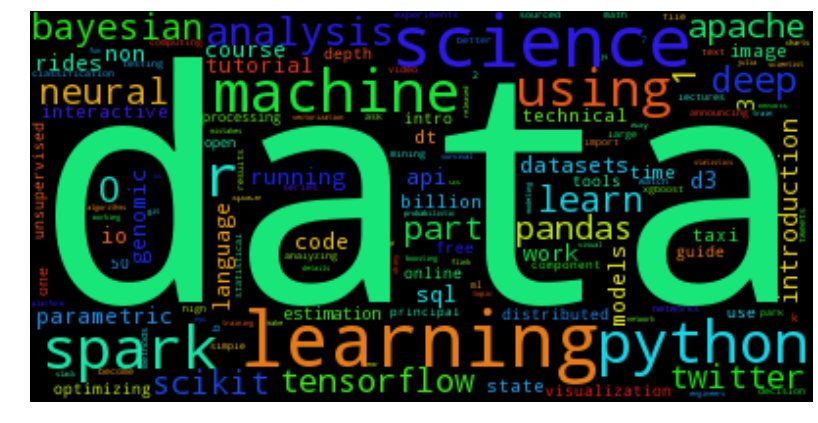

In [36]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Topic modelling (LDA - Latent Dirichlet allocation)

In natural language processing, Latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's creation is attributable to one of the document's topics.

Original Paper on LDA - http://jmlr.org/papers/v3/blei03a.html

*Summary - We describe latent Dirichlet allocation (LDA), a generative probabilistic model for collections of discrete data such as text corpora. LDA is a three-level hierarchical Bayesian model, in which each item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of text modeling, the topic probabilities provide an explicit representation of a document. We present efficient approximate inference techniques based on variational methods and an EM algorithm for empirical Bayes parameter estimation. We report results in document modeling, text classification, and collaborative filtering, comparing to a mixture of unigrams model and the probabilistic LSI model.*

Here is a graphical approach to build intuition around this topic - http://www.mblondel.org/journal/2010/08/21/latent-dirichlet-allocation-in-python/

Here is a video which explains LDA - https://www.youtube.com/watch?v=ePUAZ8RG-3w


In [37]:
import lda
import numpy as np
import lda.datasets
import sklearn.feature_extraction.text as text

### Generating the document term matrix

In [38]:
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [39]:
dtm = vectorizer.fit_transform(df.title).toarray()

In [40]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Loading the vocabulary

In [41]:
vocab = np.array(vectorizer.get_feature_names())

In [42]:
vocab[:20]

array(['10', '101', '11', '16', '2016', '50', '8m', 'access', 'advances',
       'affect', 'age', 'agree', 'aka', 'algorithms', 'amazon',
       'analogies', 'analysis', 'analytical', 'analytics', 'analyze'], 
      dtype='<U15')

In [43]:
titles = df.title

In [44]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)

In [45]:
model.fit(dtm)

In [46]:
model.topic_word_

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

In [47]:
topic_word = model.topic_word_ 

In [48]:
topic_word

array([[  5.36834272e-03,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.31519082e-05,   5.31519082e-05],
       [  5.31519082e-05,   5.31519082e-05,   5.31519082e-05, ...,
          5.31519082e-05,   5.36834272e-03,   5.31519082e-05],
       [  4.75873227e-05,   4.80631960e-03,   4.75873227e-05, ...,
          4.75873227e-05,   4.75873227e-05,   4.75873227e-05],
       [  4.42203944e-05,   4.42203944e-05,   4.46625984e-03, ...,
          4.46625984e-03,   4.42203944e-05,   4.46625984e-03],
       [  6.09236018e-05,   6.09236018e-05,   6.09236018e-05, ...,
          6.09236018e-05,   6.09236018e-05,   6.09236018e-05]])

### Finding the key words that come together for each topic

In [49]:
n_top_words = 8

In [50]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: spark apache pandas code work taxi open
Topic 1: learning machine deep non guide interactive depth
Topic 2: data science course introduction sql use genomic
Topic 3: python using analysis bayesian neural learn scikit
Topic 4: twitter io language api processing d3 free


### Finding the Topic for each Document

In [51]:
doc_topic = model.doc_topic_

In [52]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

topic: 4 , Deep Advances in Generative Modeling
topic: 3 , A Neural Network in 11 lines of Python 
topic: 1 , Python, Machine Learning, and Language Wars
topic: 2 , Markov Chains Explained Visually
topic: 3 , Dplython: Dplyr for Python
topic: 3 , Inferring causal impact using Bayesian structural time-series models
topic: 4 , Tutorial: Web scraping and mapping breweries with import.io and R
topic: 0 , A Billion Taxi Rides on Amazon EMR running Spark
topic: 3 , The rise of greedy robots
topic: 3 , Extracting image metadata at scale


# Sentiment Analysis

Sentiment analysis aims to determine the attitude of a speaker or a writer with respect to some topic or the overall contextual polarity of a document. The attitude may be his or her judgment or evaluation (see appraisal theory), affective state (that is to say, the emotional state of the author when writing), or the intended emotional communication (that is to say, the emotional effect the author wishes to have on the reader).

A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level — whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral. We will use knowledge-based techniques classify text by affect categories based on the presence of unambiguous affect words such as happy, sad, afraid, and bored.

Here is a link to the Sentiment Analysis from nltk site - http://www.nltk.org/howto/sentiment.html

Here is an example of Sentiment Analysis on Tweets data - http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/


In [53]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [54]:
pos_features = []
neg_features = []

In [55]:
def make_full_dict(word):
    return dict([(word, True)])

In [56]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [57]:
pos_features

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [58]:
with open('negative_words.txt','r',encoding='utf-8') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [59]:
neg_features

[[{'2-faced': True}, 'neg'],
 [{'2-faces': True}, 'neg'],
 [{'abnormal': True}, 'neg'],
 [{'abolish': True}, 'neg'],
 [{'abominable': True}, 'neg'],
 [{'abominably': True}, 'neg'],
 [{'abominate': True}, 'neg'],
 [{'abomination': True}, 'neg'],
 [{'abort': True}, 'neg'],
 [{'aborted': True}, 'neg'],
 [{'aborts': True}, 'neg'],
 [{'abrade': True}, 'neg'],
 [{'abrasive': True}, 'neg'],
 [{'abrupt': True}, 'neg'],
 [{'abruptly': True}, 'neg'],
 [{'abscond': True}, 'neg'],
 [{'absence': True}, 'neg'],
 [{'absent-minded': True}, 'neg'],
 [{'absentee': True}, 'neg'],
 [{'absurd': True}, 'neg'],
 [{'absurdity': True}, 'neg'],
 [{'absurdly': True}, 'neg'],
 [{'absurdness': True}, 'neg'],
 [{'abuse': True}, 'neg'],
 [{'abused': True}, 'neg'],
 [{'abuses': True}, 'neg'],
 [{'abusive': True}, 'neg'],
 [{'abysmal': True}, 'neg'],
 [{'abysmally': True}, 'neg'],
 [{'abyss': True}, 'neg'],
 [{'accidental': True}, 'neg'],
 [{'accost': True}, 'neg'],
 [{'accursed': True}, 'neg'],
 [{'accusation': True}

In [60]:
len(pos_features),len(neg_features)

(8020, 4783)

In [61]:
trainFeatures = pos_features + neg_features

In [62]:
trainFeatures

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [63]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [64]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [65]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [66]:
import re

In [67]:
neg_test = 'I hate data science'

In [68]:
title_words = re.findall(r"[\w']+|[.,!?;]",
                         'The Daily Mail stole My Visualization, Twice')

In [69]:
title_words

['The', 'Daily', 'Mail', 'stole', 'My', 'Visualization', ',', 'Twice']

In [70]:
test=[]

In [71]:
test.append([make_full_dict_sent(title_words),''])

In [72]:
test

[[{',': True,
   'Daily': True,
   'Mail': True,
   'My': True,
   'The': True,
   'Twice': True,
   'Visualization': True,
   'stole': True},
  '']]

In [73]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

neg


In [74]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc.lower())
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    

pos Deep Advances in Generative Modeling
pos A Neural Network in 11 lines of Python 
pos Python, Machine Learning, and Language Wars
pos Markov Chains Explained Visually
pos Dplython: Dplyr for Python
pos Inferring causal impact using Bayesian structural time-series models
pos Tutorial: Web scraping and mapping breweries with import.io and R
pos A Billion Taxi Rides on Amazon EMR running Spark
neg The rise of greedy robots
pos Extracting image metadata at scale
pos Python for Data Structures, Algorithms, and Interviews
pos Lift charts - A data scientist's secret weapon
pos How To Become A Machine Learning Expert In One Simple Step
pos Data Science Side Project
pos Simple estimation of hierarchical events with petersburg
pos Engineers Shouldn?t Write ETL: High Functioning Data Science Departments
pos Unsupervised Computer Vision: The Current State of the Art
pos What data visualization tools do /r/DataIsBeautiful OC creators use?
neg Data Engineering at Slack: Twelve Mistakes I've Made 